# Lecture 14- Visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Lets load up some of the data from last lecture and investigate how to visualize it.

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Matplotlib

`matplotlib` is the most commonly used plotting tool in the python ecosystem. There is extensive documentation, and you are encouraged to look through the [Tutorials](https://matplotlib.org/3.3.3/tutorials/index.html).

But before we dive into the techinical aspects of making plots, let's first think of what type of plots may be useful in a data science context.


## Histograms

As discussed throughout the course, a dataset typically consists of data points, each of which is a set of observations of the same set of random variables. What we are describing is a table, with each row corresponding to a data point, and each column a random variable. 

Lets look at one variable:

(array([ 12.,  73., 106.,  69.,  35.,   3.,   4.,   0.,   0.,   1.]),
 array([126. , 169.8, 213.6, 257.4, 301.2, 345. , 388.8, 432.6, 476.4,
        520.2, 564. ]),
 <a list of 10 Patch objects>)

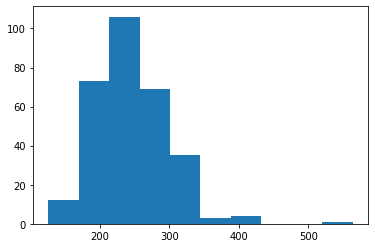

In [4]:
plt.hist(df["chol"])

with more bins:

(array([ 2.,  1.,  2.,  2.,  5., 11.,  7.,  9., 24., 22., 18., 23., 22.,
        23., 20., 18., 18., 14.,  9., 10., 15.,  6.,  7.,  4.,  3.,  1.,
         2.,  0.,  0.,  0.,  1.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([126.  , 134.76, 143.52, 152.28, 161.04, 169.8 , 178.56, 187.32,
        196.08, 204.84, 213.6 , 222.36, 231.12, 239.88, 248.64, 257.4 ,
        266.16, 274.92, 283.68, 292.44, 301.2 , 309.96, 318.72, 327.48,
        336.24, 345.  , 353.76, 362.52, 371.28, 380.04, 388.8 , 397.56,
        406.32, 415.08, 423.84, 432.6 , 441.36, 450.12, 458.88, 467.64,
        476.4 , 485.16, 493.92, 502.68, 511.44, 520.2 , 528.96, 537.72,
        546.48, 555.24, 564.  ]),
 <a list of 50 Patch objects>)

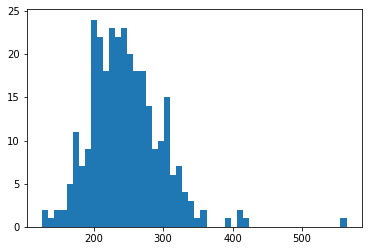

In [5]:
plt.hist(df["chol"],bins=50)

Suppress the return values:

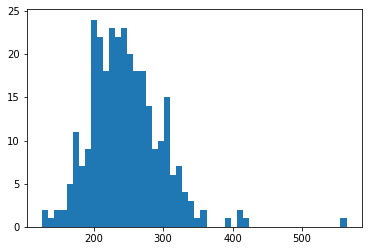

In [6]:
_=plt.hist(df["chol"],bins=50)

There are two populations in the dataset, those with and without heart disease. We would like to see if any of features about the patients (e.g. their cholestrol level) correlate with the disease. Let's first divide us the data into the two populations:

In [7]:
cp_0_selection=df["cp"]==0
cp_not_0_selection=df["cp"]!=0

Then separately historgram the feature to see if the distributions look different for the two populations:

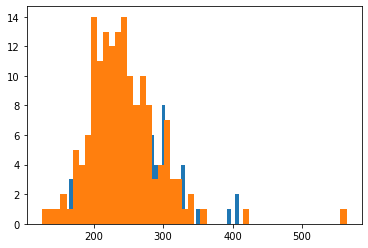

In [8]:
_=plt.hist(df[cp_0_selection]["chol"],bins=50)
_=plt.hist(df[cp_not_0_selection]["chol"],bins=50)

Hmmm... which is which? Need a legend:

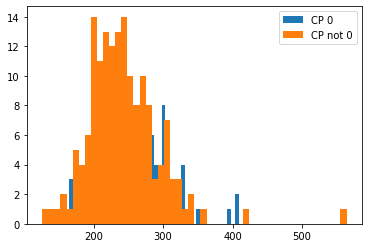

In [9]:
_=plt.hist(df[cp_0_selection]["chol"],bins=50,label="CP 0")
_=plt.hist(df[cp_not_0_selection]["chol"],bins=50,label="CP not 0")
_=plt.legend()

Can't see too well... make the histograms partially transparent:

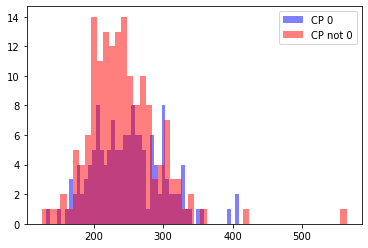

In [10]:
_=plt.hist(df[cp_0_selection]["chol"],bins=50,alpha=.5,color='b',label="CP 0")
_=plt.hist(df[cp_not_0_selection]["chol"],bins=50,alpha=.5,color='r',label="CP not 0")
_=plt.legend()

Not sure if there is a difference in the distributions because there different number of patients in the two populations:

In [12]:
print(np.sum(cp_0_selection))
print(np.sum(cp_not_0_selection))

143
160


What we need is to "normalize" the histogram so the integral is the same, namely 1, therefore we can interpret the histogram as a density:

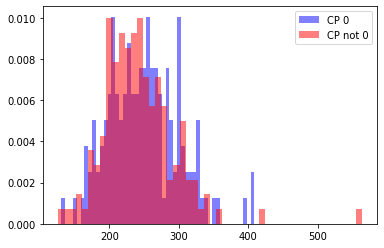

In [13]:
_=plt.hist(df[cp_0_selection]["chol"],bins=50,alpha=.5,color='b',density=1,label="CP 0")
_=plt.hist(df[cp_not_0_selection]["chol"],bins=50,alpha=.5,color='r',density=1,label="CP not 0")
_=plt.legend()

Now we want to do it for all the features, so lets write a function, first to nicely compare distributions of different populations:

In [14]:
def compare_distributions(df,column_name,selections,**kwargs):
    for label,selection in selections.items():        
        _=plt.hist(df[selection][column_name],label=label,**kwargs)

    _=plt.legend()


Note that we define the populations using a dictionary:

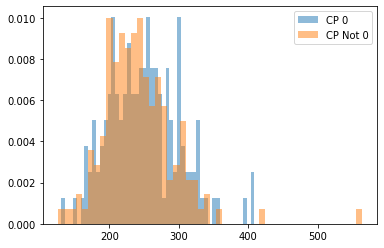

In [15]:
compare_distributions(df,"chol",
                     {"CP 0":df["cp"]==0.,
                      "CP Not 0":df["cp"]!=0},
                     alpha=0.5,
                     density=1,
                     bins=50,
                     )

Now lets histogram every feature:

age


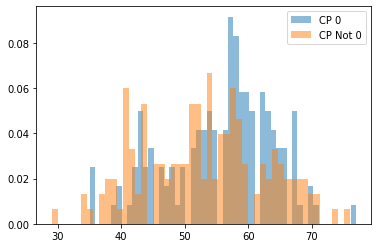

sex


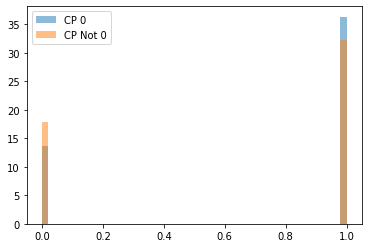

cp


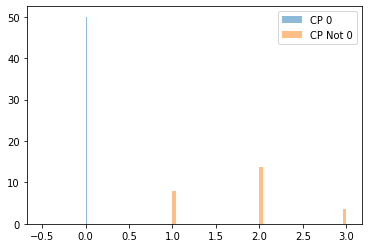

trestbps


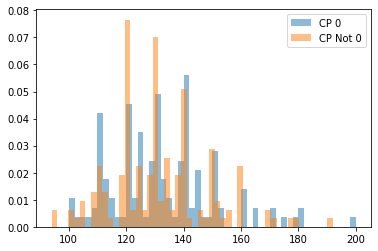

chol


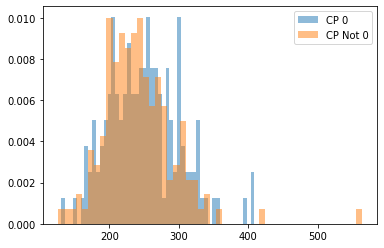

fbs


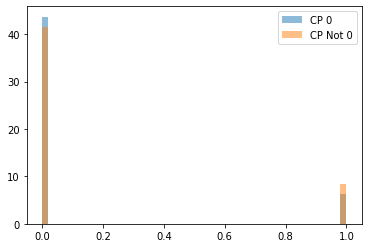

restecg


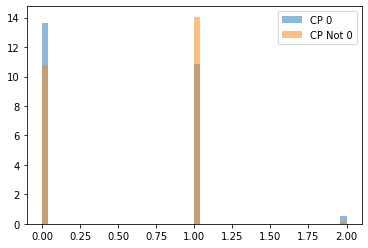

thalach


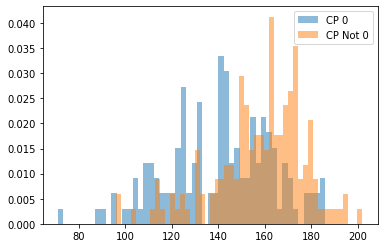

exang


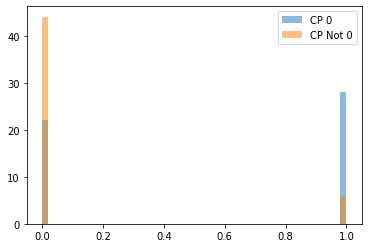

oldpeak


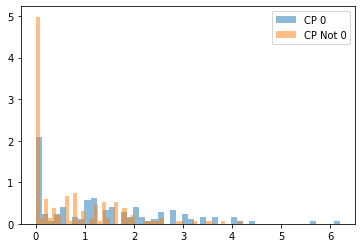

slope


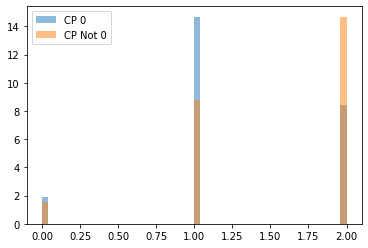

ca


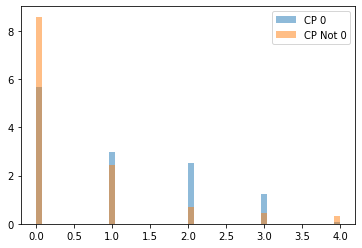

thal


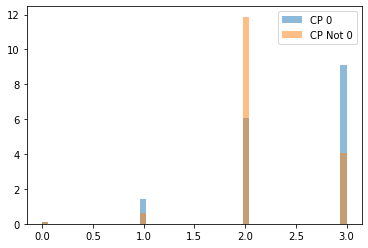

target


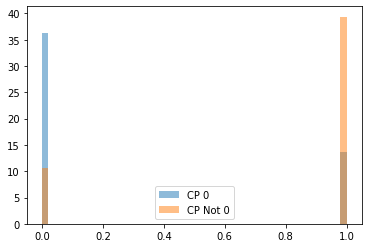

In [17]:
selection_dict={"CP 0":df["cp"]==0.,"CP Not 0":df["cp"]!=0}

for column_name in df.columns:
    print(column_name)
    compare_distributions(df,column_name,
                     selection_dict,
                     alpha=0.5,
                     density=1,
                     bins=50,
                     )
    plt.show()

In [18]:
len(df.columns)

14

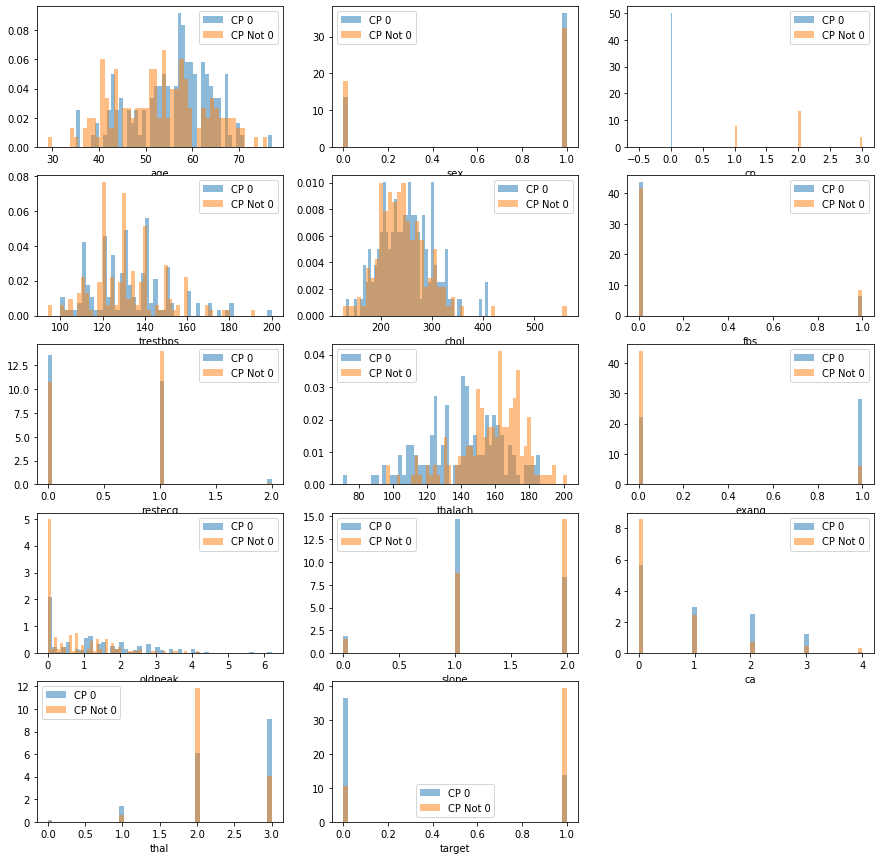

In [19]:
selection_dict={"CP 0":df["cp"]==0.,"CP Not 0":df["cp"]!=0}

plt.figure(figsize=(15,15))

for i,column_name in enumerate(df.columns):
    plt.subplot(5,3,i+1)
    compare_distributions(df,column_name,
                     selection_dict,
                     alpha=0.5,
                     density=1,
                     bins=50,
                     stacked=True
                     )
    plt.xlabel(column_name)
plt.show()

## 1-D Plots

In [ ]:
import math

x = np.linspace(-2.*math.pi,2.*math.pi,100)
y = list(map(math.sin,x))

_=plt.plot(x,y)

In [ ]:
x = np.linspace(-2.*math.pi,2.*math.pi,100)
y_1 = list(map(math.sin,x))
y_2 = list(map(math.cos,x))

_=plt.plot(x,y_1,label="sin")
_=plt.plot(x,y_2,label="cos")

_=plt.legend()

In [ ]:
df.columns

In [ ]:
_=plt.plot(df["thalach"],df["chol"])

## 2-D Plots

In [ ]:
_=plt.scatter(df["thalach"],df["chol"])

In [ ]:
selection_dict={"CP 0":df["cp"]==0.,"CP Not 0":df["cp"]!=0}

for label,selection in selection_dict.items():   
    _=plt.scatter(df[selection]["thalach"],df[selection]["chol"],label=label)

_=plt.xlabel("thalach")
_=plt.ylabel("chol")

_=plt.legend()


In [ ]:
selection_dict={"CP 0":df["cp"]==0.,"CP Not 0":df["cp"]!=0}

def compare_scatter(df,x_var_name,y_var_name,selections,make_legend=True) :
    for label,selection in selections.items():   
        _=plt.scatter(df[selection][x_var_name],df[selection][y_var_name],label=label)

    _=plt.xlabel(x_var_name)
    _=plt.ylabel(y_var_name)

    if make_legend:
        _=plt.legend()



In [ ]:
compare_scatter(df,"thalach","chol",selection_dict)

In [ ]:
for x_var_name in df.columns:
    for y_var_name in df.columns:
        compare_scatter(df,x_var_name,y_var_name,selection_dict)
        plt.show()


In [ ]:
columns = df.columns[1:6]
n_columns=len(columns)
plt.figure(figsize=(15,15))

plot_i=0
for i,x_var_name in enumerate(columns):
    for j,y_var_name in enumerate(columns):
        plot_i+=1
        plt.subplot(n_columns,n_columns,plot_i)
        make_legend = plot_i==1
        compare_scatter(df,x_var_name,y_var_name,selection_dict,make_legend=make_legend)



In [ ]:
# Pair plot

columns = df.columns[1:6]
n_columns=len(columns)
plt.figure(figsize=(15,15))

plot_i=0
for i,x_var_name in enumerate(columns):
    for j,y_var_name in enumerate(columns):
        plot_i+=1
        plt.subplot(n_columns,n_columns,plot_i)
        make_legend = plot_i==1
        if i==j:
            compare_distributions(df,x_var_name,
                     selection_dict,
                     alpha=0.5,
                     density=1,
                     bins=50,
                     )
        else:
            compare_scatter(df,x_var_name,y_var_name,selection_dict,make_legend=make_legend)

In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(df,hue="cp")